In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)
df.head()  # Display the first few rows


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
print(df.isnull().sum())  # Check missing values

# Fill missing numerical values with the median
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


<ipython-input-8-3abd24903c04>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-8-3abd24903c04>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use


In [ ]:
print(df.columns)



Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
target_col = "Aggregate rating"  # Use this exact name from df.columns
  # Use the correct name from print(df.columns)

# Ensure no leading/trailing spaces
df.columns = df.columns.str.strip()

X = df.drop(columns=[target_col])
y = df[target_col]


In [ ]:
print(df.head())  # Check the first few rows
print(df.columns) # Verify column names




   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3748           162    73     8685       171   
1        6304287             3172           162    73     6055       593   
2        6300002             2896           162    75     4684       308   
3        6318506             4707           162    75     8690       862   
4        6314302             5523           162    75     8689       862   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0               172  121.027535  14.565443       920  ...         0   
1               601  121.014101  14.553708      1111  ...         0   
2               314  121.056831  14.581404      1671  ...         0   
3               875  121.056475  14.585318      1126  ...         0   
4               875  121.057508  14.584450      1122  ...         0   

   Has Table booking  Has Online delivery  Is delivering now  \
0                  1                    0           

In [ ]:
from sklearn.model_selection import train_test_split

df.columns = df.columns.str.strip()  # Remove extra spaces if any

X = df.drop(columns=[target_col])  # Drop target column
y = df[target_col]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (7640, 20) (7640,)
Testing set size: (1911, 20) (1911,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression MSE: 1.2186925059460247
Linear Regression R2: 0.4645719905617005


In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression - MSE: {mse_dt}, R-squared: {r2_dt}")


Decision Tree Regression - MSE: 0.056132914704343256, R-squared: 0.9753382131772561


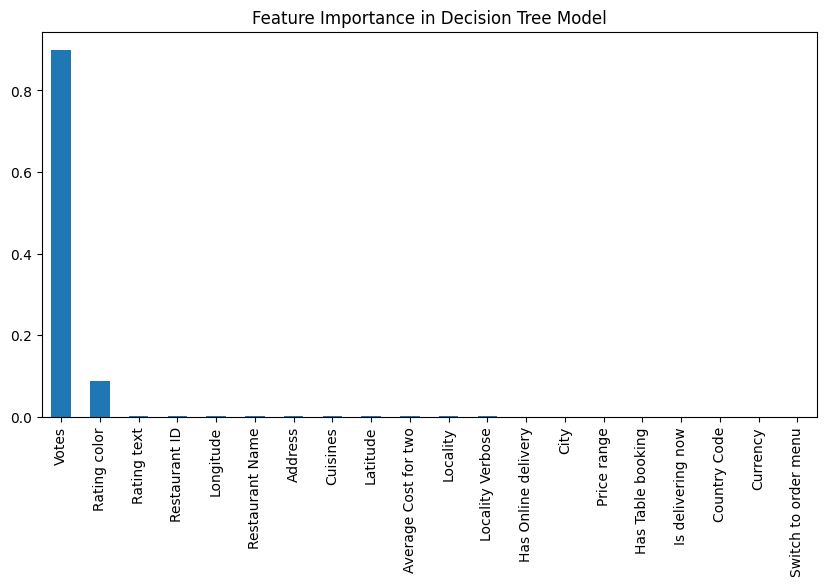

In [ ]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance in Decision Tree Model")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Compute Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Compute Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


In [ ]:
print("Model Performance Comparison:")
print(f"Linear Regression -> MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}")
print(f"Decision Tree Regression -> MSE: {mse_dt:.4f}, R2: {r2_dt:.4f}")


Model Performance Comparison:
Linear Regression -> MSE: 1.2187, R2: 0.4646
Decision Tree Regression -> MSE: 0.0580, R2: 0.9745


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")


Random Forest -> MSE: 0.0272, R2: 0.9880


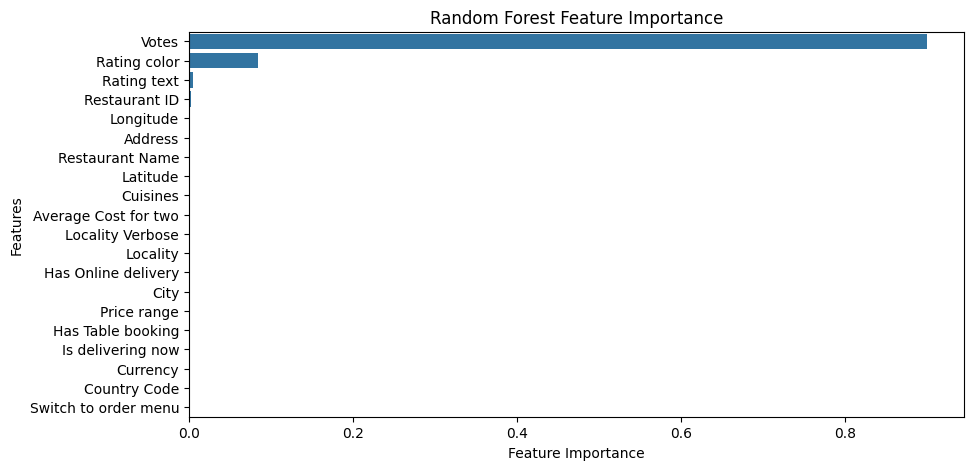

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort and plot
sorted_indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
train_pred_rf = rf_model.predict(X_train)
mse_train_rf = mean_squared_error(y_train, train_pred_rf)
r2_train_rf = r2_score(y_train, train_pred_rf)

print(f"Random Forest (Train) -> MSE: {mse_train_rf:.4f}, R2: {r2_train_rf:.4f}")
print(f"Random Forest (Test)  -> MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Define target variable
target_col = "Aggregate rating"  # Ensure this matches your dataset

# Drop non-numeric or unnecessary columns
X = df.drop(columns=["Restaurant ID", "Restaurant Name", "Address", "Locality",
                     "Locality Verbose", "Cuisines", "Currency", "Aggregate rating"])

y = df[target_col]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


Random Forest (Train) -> MSE: 0.0038, R2: 0.9984
Random Forest (Test)  -> MSE: 0.0272, R2: 0.9880


LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)


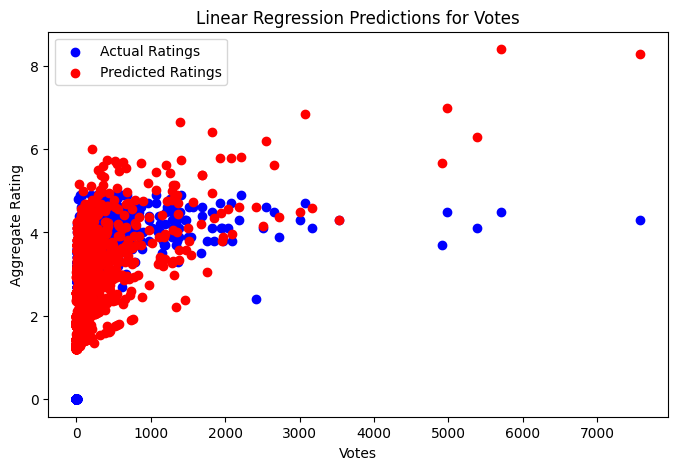

In [ ]:
plt.figure(figsize=(8, 5))

# Choose one feature (e.g., Votes)
feature = "Votes"

plt.scatter(X_test[feature], y_test, color="blue", label="Actual Ratings")  # True values
plt.scatter(X_test[feature], y_pred_lr, color="red", label="Predicted Ratings")  # Predicted values

plt.xlabel(feature)
plt.ylabel("Aggregate Rating")
plt.title(f"Linear Regression Predictions for {feature}")
plt.legend()
plt.show()


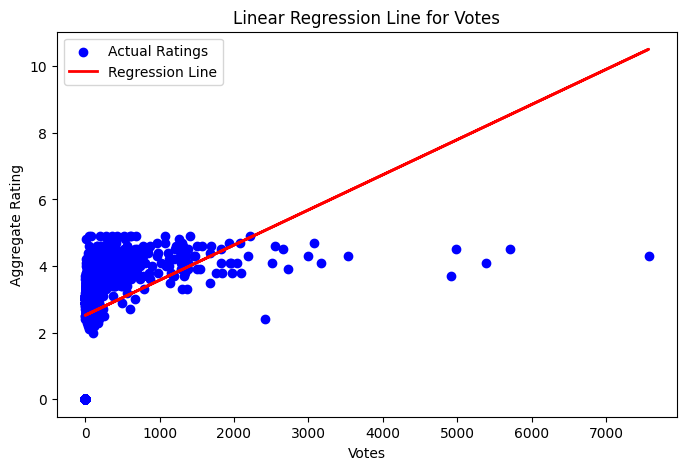

In [ ]:
plt.figure(figsize=(8, 5))

# Choose one feature (e.g., "Votes")
feature = "Votes"
X_feature = X_test[feature].values.reshape(-1, 1)

# Train a simple Linear Regression model using only one feature
lr_single = LinearRegression()
lr_single.fit(X_feature, y_test)

# Generate predictions
y_pred_feature = lr_single.predict(X_feature)

# Plot data points and regression line
plt.scatter(X_feature, y_test, color="blue", label="Actual Ratings")
plt.plot(X_feature, y_pred_feature, color="red", linewidth=2, label="Regression Line")

plt.xlabel(feature)
plt.ylabel("Aggregate Rating")
plt.title(f"Linear Regression Line for {feature}")
plt.legend()
plt.show()


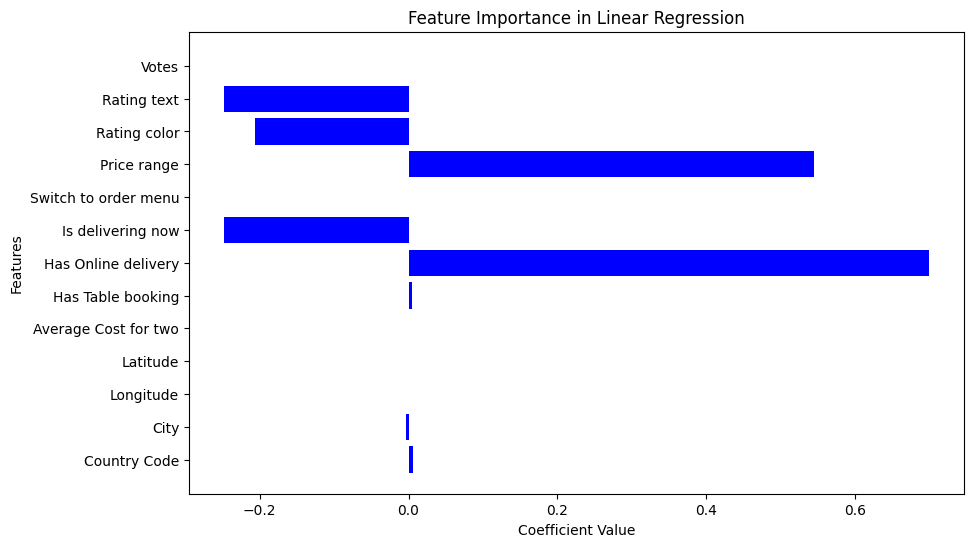

In [ ]:
coefficients = lr_model.coef_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression")
plt.show()
